**Лабораторная работа 1**

Найдите временной ряд с ценами активов (цены акций, облигаций, нефти, криптовалюты и т.д.)
Отобразите временной ряд на графике
Оцените его
Сделайте начальные выводы
Постройте 4 скользящие средние с окнами (5, 10, 30, 50)
Оцените график с скоьзящими среднмии
Сделайте предыдыдущие 2 пункта с экспоненциальными скользящими средними
Сделайте прогноз движения актива на основе экспоненциального скользящего среднего на 5 периодов вперед.
Сделайте выводы по проделанной работе и опипшите их.

Загрузим необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузим данные

In [6]:
df = pd.read_csv('apple.csv')
df = df.iloc[::-1]
df.index = df.index[::-1]
df

,Date,Price,Open,High,Low,Volume
0,12/12/1980,0.13,0.13,0.13,0.13,469030000
1,12/15/1980,0.12,0.12,0.12,0.12,175880000
2,12/16/1980,0.11,0.11,0.11,0.11,105730000
3,12/17/1980,0.12,0.12,0.12,0.12,86440000
4,12/18/1980,0.12,0.12,0.12,0.12,73450000
...,...,...,...,...,...,...
10622,05/08/2023,173.50,172.48,173.85,172.11,55960000
10623,05/09/2023,171.77,173.05,173.54,171.60,45330000
10624,05/10/2023,173.55,173.02,174.03,171.90,53720000
10625,05/11/2023,173.75,173.85,174.59,172.17,49510000


Отобразим график временного ряда

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

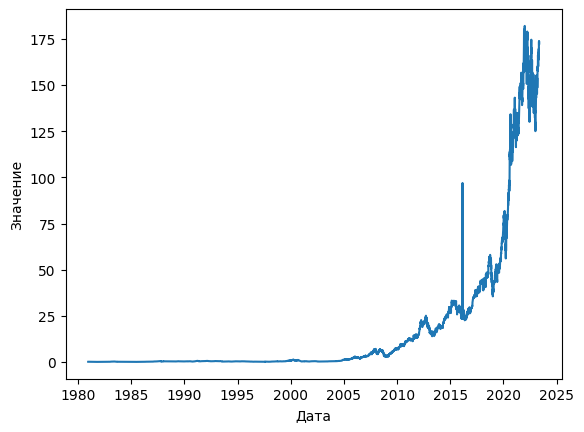

In [7]:
df['Date']=pd.to_datetime(df['Date'])
plt.plot(df['Date'],df['Price'], label="Исходный график")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt

**Вывод:** цена акций с течением времени растет. В 2016 году было сильное отклоненине. С 2010 идет резкий рост относительно всего времени

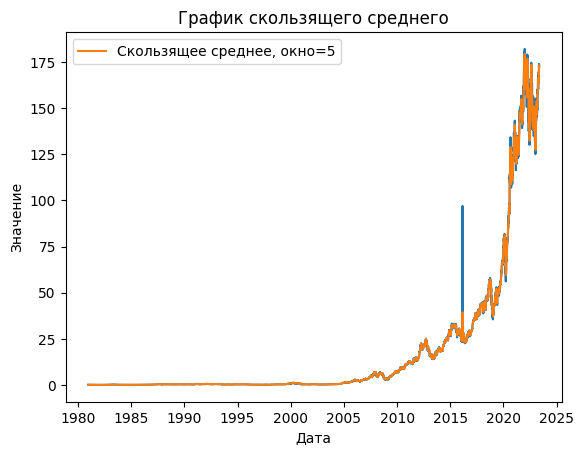

In [ ]:
rolling_mean = df['Price'].rolling(window=5).mean()
plt.plot(df['Date'],df['Price'])
plt.plot(df['Date'],rolling_mean,label="Скользящее среднее, окно=5")
plt.title("График скользящего среднего")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.legend()

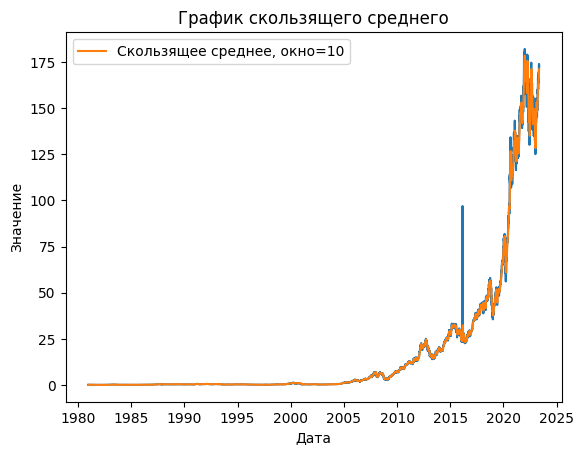

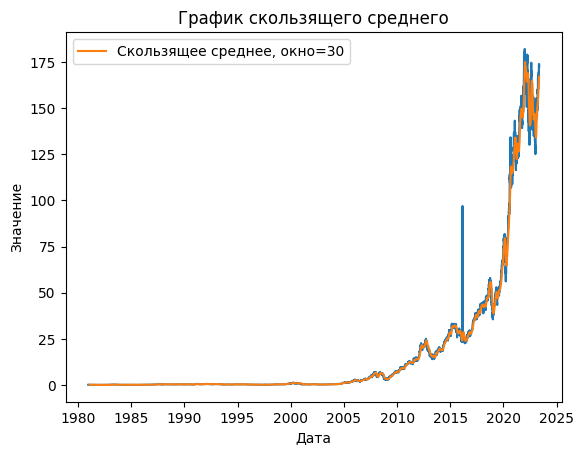

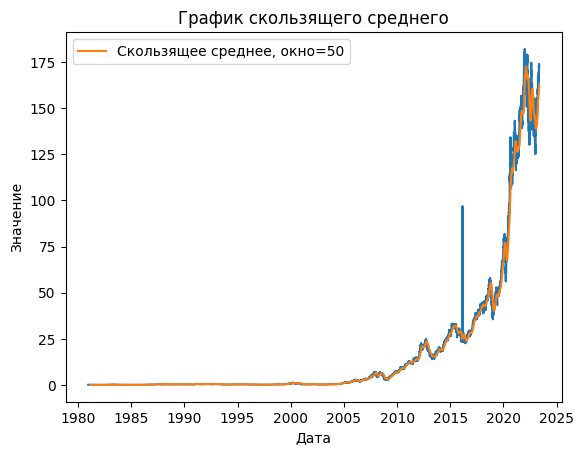

In [ ]:
for i in range(10,51,20):
  plt.figure()
  rolling_mean = df['Price'].rolling(window=i).mean()
  plt.plot(df['Date'],df['Price'])
  txt = "Скользящее среднее, окно="+str(i)
  plt.plot(df['Date'],rolling_mean,label=txt)
  plt.title("График скользящего среднего")
  plt.xlabel("Дата")
  plt.ylabel("Значение")
  plt.legend()

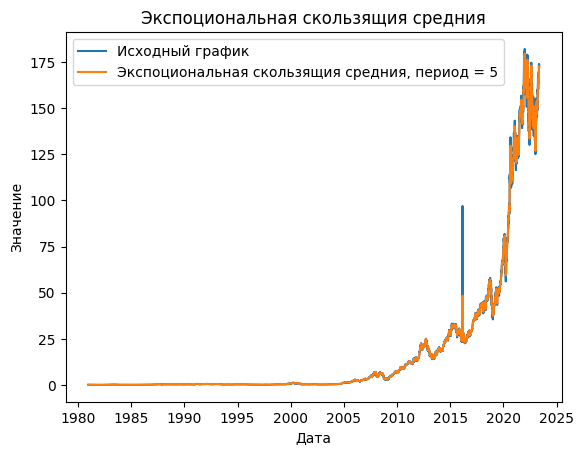

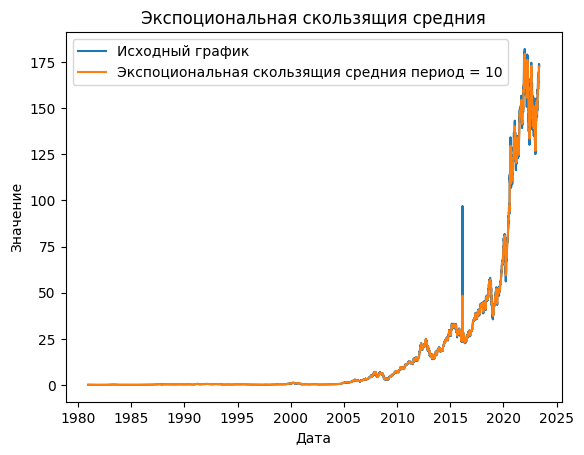

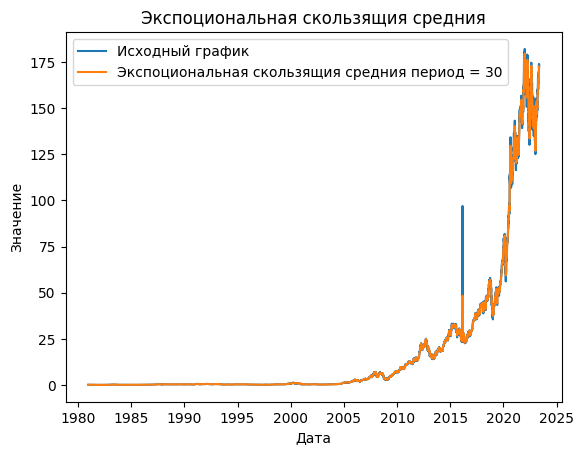

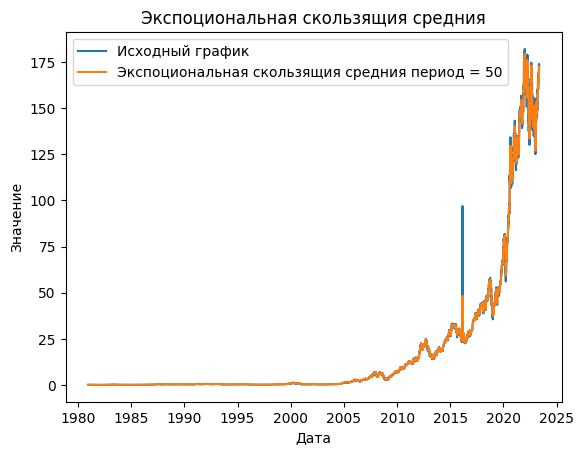

In [8]:
ema = df['Price'].ewm(span=5,adjust=False).mean()
plt.plot(df['Date'],df['Price'], label="Исходный график")
plt.plot(df['Date'],ema, label="Экспоциональная скользящия средния, период = 5")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Экспоциональная скользящия средния")
plt.legend()
for i in range(10,51,20):
  plt.figure()
  ema = df['Price'].ewm(span=5,adjust=False).mean()
  plt.plot(df['Date'],df['Price'], label="Исходный график")
  plt.plot(df['Date'],ema, label="Экспоциональная скользящия средния период = "+str(i))
  plt.xlabel("Дата")
  plt.ylabel("Значение")
  plt.title("Экспоциональная скользящия средния")
  plt.legend()

Расчитаем коэффицент alpha и посчитаем будующие значения следующих 5 периодов


[172.54514061530531,
 172.53685415374042,
 172.53409199988545,
 172.5331712819338,
 172.5328643759499]

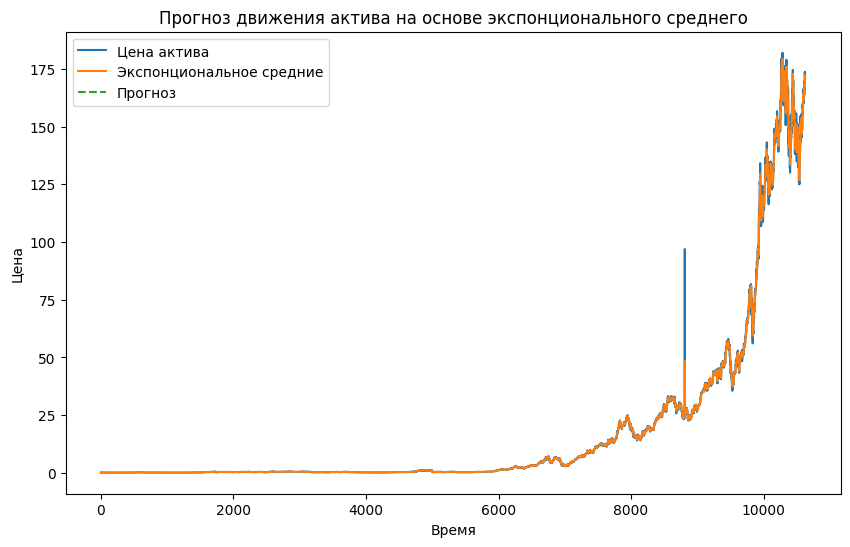

In [15]:
ema = df['Price'].ewm(span=5,adjust=False).mean()
last_ema = ema.iloc[-1]
alpha = 2 / (5 + 1)
forecast = []
price = df['Price'].iloc[-1]
for i in range(5):
    price = alpha * price + (1 - alpha) * last_ema
    forecast.append(price)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Цена актива')
plt.plot(df.index, ema, label=f'Экспонциональное средние')
plt.plot(range(len(df), len(df) + 5), forecast, label='Прогноз', linestyle='--')
plt.legend()
plt.title('Прогноз движения актива на основе экспонционального среднего')
plt.xlabel('Время')
plt.ylabel('Цена')
plt
forecast